In [105]:
import cv2
import os
import time
import torchvision.transforms as T
import torchvision.transforms.functional as TF

In [106]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [107]:
img = cv2.imread("data/imgs/1501.png")

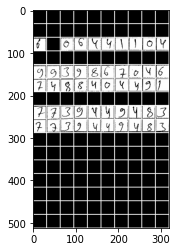

In [108]:
plt.imshow(img)

In [109]:
img.shape

(512, 320, 3)

In [110]:
def proc_img(inpath="data/imgs", outpath="data/row_imgs", \
             inlabel="data/labels.txt", outlabel="data/row_labels.txt"):
    s = 32
    p = 1
    labels = []
    with open(inlabel, "r") as f:
        for e in f.readlines():
            k, v = e.strip().split(",")
            labels.append([k, v])
    fnames = os.listdir(inpath)
    for fname in fnames:
        key = fname[:-4]
        tmp_labels = []
        for e in labels:
            if e[0] == key:
                tmp_labels.append(e[1])
        with open(outlabel,"a") as f:
            for j in range(len(tmp_labels)):
                name = key+"_%s.png"%j
                f.write("%s,%s\n"%(name,tmp_labels[j]))
        image = cv2.imread(os.path.join(inpath, fname), cv2.IMREAD_GRAYSCALE)
        for i in range(len(tmp_labels)):
            img = image[i*s:(i+1)*s]
            save_name = os.path.join(outpath, fname[:-4]+"_%s.png"%i)
            cv2.imwrite(save_name, img)
        

In [111]:
proc_img(outpath="data/seq_imgs", outlabel="data/seq_labels.txt")